## КМ 4

1. Средствами SymPy составьте матрицу
$A = \begin{pmatrix}
     t& 1\\
     -1&t
     \end{pmatrix}$, вычислите собственные числа этой матрицы. Сколько будет собственных чисел? Извлеките собственные числа и постройте графики зависимостей их величин от 𝑡 ∈ [0,1]
2. На занятии мы анализировали открытые данные по эпидемии Covid-19. Загрузите актуальные данные. Постройте DataFrame для сравнения данных по числу заболевших, выздоровевших и умерших для Соединенных штатов, Испании, России, Украины и Польши. 

In [91]:
from sympy import Matrix, pretty_print, init_printing, lambdify
from sympy.abc import t
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt
init_printing()

M = Matrix([[t, 1], [-1, t]])
eig = M.eigenvals()
print('Собственные числа:') # 2 числа
eig

Собственные числа:


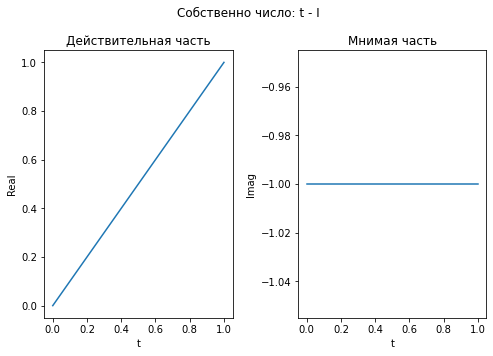

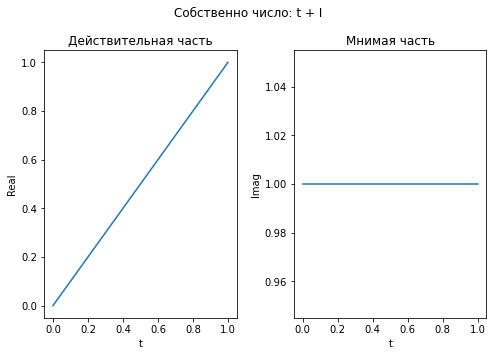

In [92]:
tt = np.linspace(0, 1, 100)
for key in eig:
    en = lambdify(t, key, 'numpy')(tt)
    fig = plt.figure(figsize=(7, 5))
    fig.suptitle(f'Собственно число: {key}')
    ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
    ax1.set_title('Действительная часть')
    ax2.set_title('Мнимая часть')
    ax1.set_xlabel('t'), ax2.set_xlabel('t')
    ax1.set_ylabel('Real'), ax2.set_ylabel('Imag')
    ax1.plot(tt, en.real), ax2.plot(tt, en.imag)
    plt.tight_layout()
    plt.show()

In [93]:
import covid
import pandas as pd
import matplotlib.pyplot as plt


covid_world = covid.Covid(source='worldometers').get_data()
df = pd.DataFrame(covid_world)
target_countries = 'USA', 'Spain', 'Russia', 'Ukraine', 'Poland'
df = df[df.country.isin(target_countries)]
df = df[['country', 'confirmed', 'recovered', 'deaths']].sort_values(by='confirmed', ascending=False)
df

,country,confirmed,recovered,deaths
8,USA,51696205,40515145,827206
12,Russia,10214790,8984921,297203
17,Spain,5455527,4968287,88708
22,Poland,3958840,3435983,91485
24,Ukraine,3608151,3331865,93105


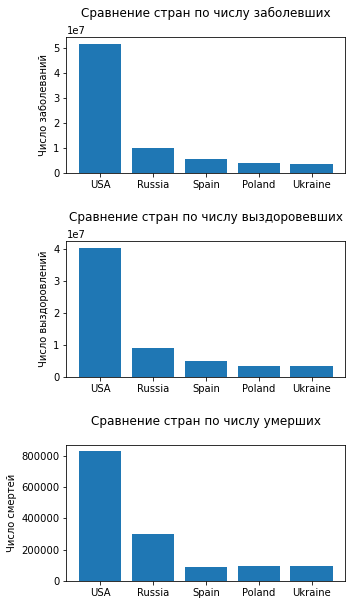

In [90]:
fig = plt.figure(figsize=(5, 10))
ax1, ax2, ax3 = fig.add_subplot(311), fig.add_subplot(312), fig.add_subplot(313)
ax1.set_title('Сравнение стран по числу заболевших', pad=20)
ax1.set_ylabel('Число заболеваний')
ax1.bar(df.country, df.confirmed)
ax2.set_title('Сравнение стран по числу выздоровевших', pad=20)
ax2.set_ylabel('Число выздоровлений')
ax2.bar(df.country, df.recovered)
ax3.set_title('Сравнение стран по числу умерших', pad=20)
ax3.set_ylabel('Число смертей')
ax3.bar(df.country, df.deaths)
plt.subplots_adjust(hspace=0.5)
plt.show()